# Estudio analítico de la iconografía del Museo Nacional Del Prado

In [3]:
#Import your libraries

import numpy as np
import pandas as pd
import re
import warnings
warnings.filterwarnings('ignore')
import pylab as plt
import seaborn as sns
import difflib
import networkx as nx

In [4]:
#%pip install pyecharts
from pyecharts import options as opts
from pyecharts.charts import Pie
from pyecharts.commons.utils import JsCode
from pyecharts.globals import ThemeType

In [8]:
obras_completo = pd.read_csv("/Users/karmelealonsoaia/Desktop/ironhack_labs/PROYECTOS/project_final/data/data_clean/obras_completo_para_estudio.csv")

# Objetivos Generales

# Hipótesis

- Las representaciones iconográficas en los cuadros guardan relación con el tiempo y la edad en la que han sido representados.
- También existe correlación entre estas representaciones iconográficas y las escuelas.

# Motivaciones

# Objetivos Generales

• Conocer la relación fecha-iconografía
• Conocer la correlación y concordancia fecha-escuelas

# Objetivos Específicos

• Conocer la relación fecha-iconografía.
• Conocer la relación fecha-escuelas.

• Conocer la correlación y concordancia fecha-iconografía.
• Conocer la correlación y concordancia fecha-escuelas.

# Material y métodos

# Criterios de inclusión

- Que se encuentre en el Museo del Prado y que tengan al menos un objeto iconográfico.
- Que tengan al menos una información iconográfica para poder contar con las variables necesarias.
- En el caso de flora y fauna, contar con su nombre en latín, el resto fueron descartados.

# Lista de variables:

1. Iconográficas
- Personajes
- Objetos
- Flora
- Fauna
- Lugar
2. Escuelas
...

# Exploración inicial de los datos.

El enfoque que se adoptará en el estudio del área iconográfica correspondiente a los objetos, será notablemente similar al que empleamos previamente al explorar la iconografía asociada a los personajes. Seguiremos un procedimiento análogo. 

Sin embargo, a diferencia del caso anterior, omitiremos el estudio de las columnas que componen el DataFrame completo. Así, comenzaremos directamente haciendo una exploración de las columnas de interés.

In [11]:
obras_completo['Objetos'].unique()

array(['Enseres domésticos', 'Florero',
       'Instrumentos de cuerda / cordófonos', 'Instrumentos musicales',
       'Violín', 'Libro', 'Desconocidos',
       'Elementos heráldicos y nobiliarios', 'Insignia / condecoración',
       'Objetos de iconografía cristiana',
       'Objetos o atributos mariológicos', 'Orbe / esfera',
       'Real y distinguida Orden de Carlos III', 'Órdenes Nobiliarias',
       'Lámpara', 'Mesa', 'Mueble', 'Mueble de asiento o reposo',
       'Objeto de iluminación', 'Silla / sillón', 'Armas', 'Espada',
       'Objeto de adorno o servicio de mesa', 'Botella', 'Jardín',
       'Cestería', 'Cesto de costura', 'Copa Berkemeyer', 'Vaso / copa',
       'Armas de fuego', 'Objeto uso individual', 'Sombrero', 'Joyas',
       'Rosario', 'Calavera / cráneo', 'Cama', 'Crucifijo',
       'Elemento de arquitectura', 'Suelo de cerámica', 'Corona',
       'Música escrita / partituras', 'Música ilegible', 'Cáliz',
       'Escultura', 'Objetos artísticos', 'Arco / flecha',
 

In [9]:
obras_completo.describe(include='object')

,Título,Autor,Fecha,Escuela,Objetos,Fauna,Flora,Lugar,Personajes,Obra_uri,Imágenes,Fecha_rango
count,655,655,655,655,319,188,655,48,309,655,655,655
unique,462,300,327,25,214,110,305,27,147,655,655,299
top,"""Florero""",Anónimo,Siglo XVII,Española,Enseres domésticos ; Florero,Paloma (Columba ssp),Azucena (Lilium candidum),Alsasua ; España ; Navarra,Virgen María,http://museodelprado.es/items/E22_Man-Made_Obj...,https://content3.cdnprado.net/imagenes/Documen...,Siglo XVII
freq,68,85,81,368,19,30,81,4,18,1,1,81


# Análisis de objetos a lo largo de los años.

En la fase inicial de este estudio, se enfocará la atención en realizar un análisis detallado acerca de cómo ha evolucionado la representación de personajes iconográficos a lo largo de los años. 

Se busca identificar tendencias y patrones en la representación artística, examinando las fluctuaciones en la frecuencia de los personajes a través del tiempo. 

Este análisis permitirá comprender mejor las preferencias y enfoques de los artistas en distintas épocas, explorando si existen cambios significativos en la representación de ciertos tipos de personajes y discerniendo qué aspectos específicos han sido destacados o modificados a lo largo de la historia. 

El objetivo último es extraer algunas conclusiones para una mejor comprensión de las dinámicas artísticas.

El estudio se llevará a cabo mediante una serie de enfoques analíticos que abordarán diversas facetas de la representación de personajes a lo largo del tiempo:

1. Estudio Comparativo/Descriptivo:
Esta fase implica una comparación entre la frecuencia de aparición de varios personajes a lo largo de los años. Este enfoque permitirá identificar posibles correlaciones entre eventos históricos o cambios artísticos y las variaciones en la representación de personajes a lo largo del tiempo.
Para captar las tendencias temporales se plantearán gráficos de líneas temporales que nos muestren la frecuencia de aparición de un personaje específico a lo largo del tiempo.

2. Estudio estadísticos y Análisis de cambios significativos:
Se investigarán cambios bruscos en la frecuencia de aparición de personajes a lo largo de ciertos períodos de tiempo. 
Se realizará un análisis detallado para examinar cómo la diversidad de personajes ha variado a lo largo de los años. Utilizando algunos índices específicos, se cuantificará la presencia de diferentes tipos de personajes en distintas épocas.

Estas metodologías seleccionadas se complementan entre sí para ofrecer un análisis profundo y preciso de la evolución temporal de la representación de personajes, considerando aspectos comparativos, cambios significativos, diversidad y análisis estadístico para obtener una visión completa y fundamentada de la dinámica artística a lo largo del tiempo.

In [59]:
objetos_año_rango = obras_completo[['Objetos', 'Año_rango', 'Año']]

In [60]:
objetos_año_rango = objetos_año_rango[objetos_año_rango['Objetos'] != 'Desconocidos']
objetos_año_rango = objetos_año_rango.reset_index(drop=True)

In [61]:
objetos_año_rango.head()

,Objetos,Año_rango,Año
0,Enseres domésticos,1601 - 1800,1640
1,Enseres domésticos,1601 - 1800,1640
2,Enseres domésticos,1601 - 1800,1640
3,Enseres domésticos,1601 - 1800,1640
4,Enseres domésticos,1601 - 1800,1640


In [62]:
objetos_año_rango.shape

(13771, 3)

In [63]:
objetos_año_rango['Objetos'].value_counts()

Enseres domésticos    1568
Florero               1062
Cestería               799
Objetos artísticos     672
Pintura                626
                      ... 
Cubertería               1
Bota de vino             1
Taza                     1
Amuleto                  1
Candil                   1
Name: Objetos, Length: 205, dtype: int64

En este contexto, donde nos movemos con datos categóricos, la tabla de contingencia es lo adecuado para realizar un análisis que nos permitirá examinar la distribución conjunta de las categorías en ambas columnas: "Personajes" y "Año_rango". Esto nos permitirá visualizar de manera precisa cómo se vinculan los personajes con los distintos rangos de años. 

Este enfoque nos permitirá entender la relación entre los diferentes personajes y el momento en el que eran representados.

In [64]:
tabla_contingencia_objetos = pd.crosstab(objetos_año_rango['Objetos'], objetos_año_rango['Año_rango'])
tabla_contingencia_objetos

Año_rango,1401 - 1600,1601 - 1800,1801 - 2000
Objetos,,,
Abanico,0,29,11
Alimentos,7,28,52
Amuleto,1,0,0
Anillo,2,0,0
Animal de carga,0,0,1
...,...,...,...
Violín,2,7,2
Órdenes Militares,4,0,0
Órdenes Nobiliarias,0,22,2


Una vez generada la tabla de contingencia, podemos llevar a cabo un análisis más específico al identificar los nombres que predominan en cada rando de años. Un enfoque efectivo para lograr esto es obtener el nombre que tiene la frecuencia máxima en cada rango, revelando así los personajes más recurrentes en cada período temporal.

In [65]:
objetos_mas_comunes = tabla_contingencia_objetos.idxmax(axis=1)
objetos_mas_comunes

Objetos
Abanico                       1601 - 1800
Alimentos                     1801 - 2000
Amuleto                       1401 - 1600
Anillo                        1401 - 1600
Animal de carga               1801 - 2000
                                 ...     
Violín                        1601 - 1800
Órdenes Militares             1401 - 1600
Órdenes Nobiliarias           1601 - 1800
Órgano                        1601 - 1800
Órgano realejo o portativo    1601 - 1800
Length: 205, dtype: object

Me gustaría encontrar el personaje que, de forma general, más se repite:

In [66]:
total_por_objeto = tabla_contingencia_objetos.sum(axis=1)

objeto_mas_comun = total_por_objeto.idxmax()
print("Objeto más común:", objeto_mas_comun)

Objeto más común: Enseres domésticos


Y a continuación el rango de fechas en el que más destaca el personaje recién obtenido:

In [67]:
datos_objeto_mas_comun = objetos_año_rango[objetos_año_rango['Objetos'] == objeto_mas_comun]

rango_mas_comun = datos_objeto_mas_comun['Año_rango'].value_counts().idxmax() #rango de fechas más común para el objeto "Enseres Domésticos".
print("Rango de fechas más común para", objeto_mas_comun, ":", rango_mas_comun)

Rango de fechas más común para Enseres domésticos : 1601 - 1800


Ahora lo haré con los diez personajes más frecuentes, ya que estos serán los protagonistas principales en la mayoría de los estudios subsiguientes. 

Al seleccionar un grupo más reducido de personajes lograremos una representación visual más clara en los gráficos.

In [68]:
objetos_mas_comunes = objetos_año_rango['Objetos'].value_counts().nlargest(10).index #10 objetos más comunes.

for objeto in objetos_mas_comunes:
    datos_objeto = objetos_año_rango[objetos_año_rango['Objetos'] == objeto]
    rango_mas_comun = datos_objeto['Año_rango'].value_counts().idxmax()
    print(f"{objeto}: {rango_mas_comun}")

Enseres domésticos: 1601 - 1800
Florero: 1601 - 1800
Cestería: 1601 - 1800
Objetos artísticos: 1601 - 1800
Pintura: 1601 - 1800
Cuadro dentro del cuadro: 1601 - 1800
Jardín: 1601 - 1800
Elemento de arquitectura: 1601 - 1800
Objeto de adorno o servicio de mesa: 1601 - 1800
Objeto uso individual: 1801 - 2000


A continuación, procederé a crear un gráfico circular (pie chart) que destacará a los diez personajes más frecuentes en nuestro dataframe, es decir, aquellos que han sido más comunmente representados. Este gráfico ofrecerá una visualización clara y concisa de la distribución de la representación de personajes, permitiéndonos identificar visualmente la prevalencia de cada uno de los diez personajes principales en el conjunto de datos.

In [69]:
objetos_año_rango['Frecuencia'] = objetos_año_rango.groupby(['Año_rango', 'Objetos'])['Objetos'].transform('count')

In [70]:
objetos_mas_comunes = objetos_año_rango['Objetos'].value_counts().nlargest(10).index

# Filtrar el DataFrame para incluir solo los 10 personajes más comunes
df_top_10 = objetos_año_rango[objetos_año_rango['Objetos'].isin(objetos_mas_comunes)]

# Calcular la frecuencia total
frecuencia_total = df_top_10['Frecuencia'].sum()

# Crear el gráfico de pastel
pie_chart = (
    Pie(init_opts=opts.InitOpts(theme=ThemeType.LIGHT))
    .add(
        series_name="Objetos",
        data_pair=[(objeto, objeto_total['Frecuencia'].sum() / frecuencia_total * 100) 
                   for objeto, objeto_total in df_top_10.groupby('Objetos')],
        radius=["30%", "75%"],
        center=["50%", "50%"],
        label_opts=opts.LabelOpts(is_show=False, position="center"),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Distribución de Frecuencia de Objetos"),
        legend_opts=opts.LegendOpts(pos_left="80%", orient="vertical"),
    )
)

pie_chart.render_notebook()


Ahora procederé a generar un mapa de calor que ilustrará la frecuencia con la que cada personaje se presenta en los distintos rangos de años determinados. En este gráfico, cada celda del mapa de calor está coloreada según la frecuencia con la que un personaje específico aparece en un rango de años determinado. Los tonos más oscuros señalan una frecuencia más alta, mientras que los tonos más claros indican una frecuencia más baja.
Además, dentro de cada celda, se presentarán números que representan la frecuencia exacta con la que un personaje aparece en un determinado rango de años, proporcionando una perspectiva numérica detallada de la distribución.

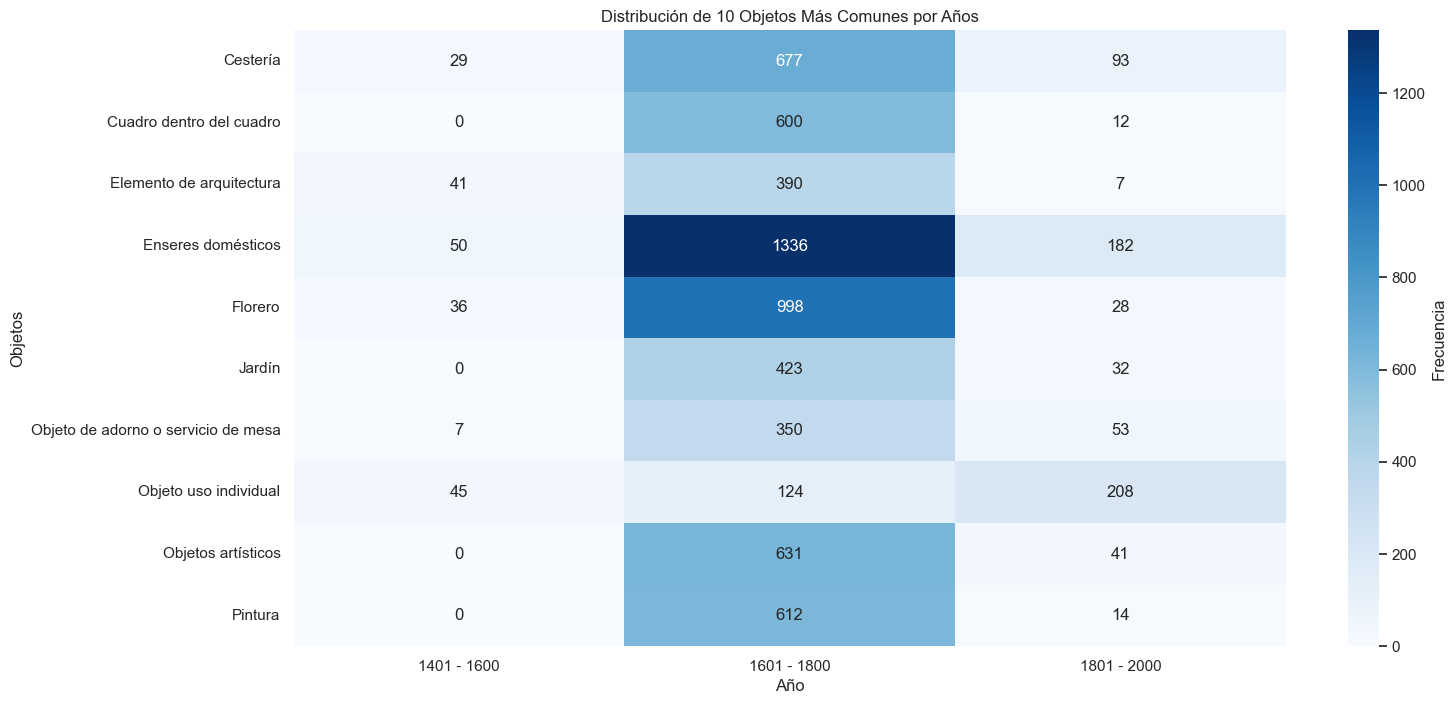

In [71]:
# En este caso lo voy a ahcer con los 10 más comunes para que se visualice mejor
diez_objetos_mas_comunes = objetos_año_rango['Objetos'].value_counts().nlargest(10).index

# Filtra el DataFrame original solo para los personajes más comunes
df_objetos_comunes = objetos_año_rango[objetos_año_rango['Objetos'].isin(diez_objetos_mas_comunes)]

# Conteo de frecuencia
tabla_contingencia_objetos = pd.crosstab(df_objetos_comunes['Objetos'], df_objetos_comunes['Año_rango'])

# Visualización del gráfico de barras
plt.figure(figsize=(16, 8))
sns.heatmap(tabla_contingencia_objetos, cmap='Blues', annot=True, fmt='d', cbar_kws={'label': 'Frecuencia'})
plt.title('Distribución de 10 Objetos Más Comunes por Años')
plt.xlabel('Año')
plt.ylabel('Objetos')
plt.show()

Ahora procederé a la creación de un Gráfico de Líneas Temporales por Personaje (utlizaré en este caso también solo los diez más comunes), una representación visual que ilustrará la evolución de la frecuencia de cada personaje a lo largo de los años. Este gráfico general nos ofrecerá una visión panorámica de la distribución temporal de los personajes más comunes, permitiéndonos identificar tendencias generales en su representación a lo largo de las diferentes épocas.

En un análisis más detallado, he diseñado un segundo gráfico que se enfoca en los años en los que los personajes más comunes alcanzan su mayor recurrencia. Este "zoom" nos proporcionará una visión más específica y detallada de los períodos temporales en los que estos personajes destacan de manera significativa.

Posteriormente, hemos segmentado la información en gráficos individuales, uno por cada personaje. Este enfoque más específico nos permitirá examinar la frecuencia de representación de cada personaje de manera aislada.

In [72]:
objetos_año_rango.head()

,Objetos,Año_rango,Año,Frecuencia
0,Enseres domésticos,1601 - 1800,1640,1336
1,Enseres domésticos,1601 - 1800,1640,1336
2,Enseres domésticos,1601 - 1800,1640,1336
3,Enseres domésticos,1601 - 1800,1640,1336
4,Enseres domésticos,1601 - 1800,1640,1336


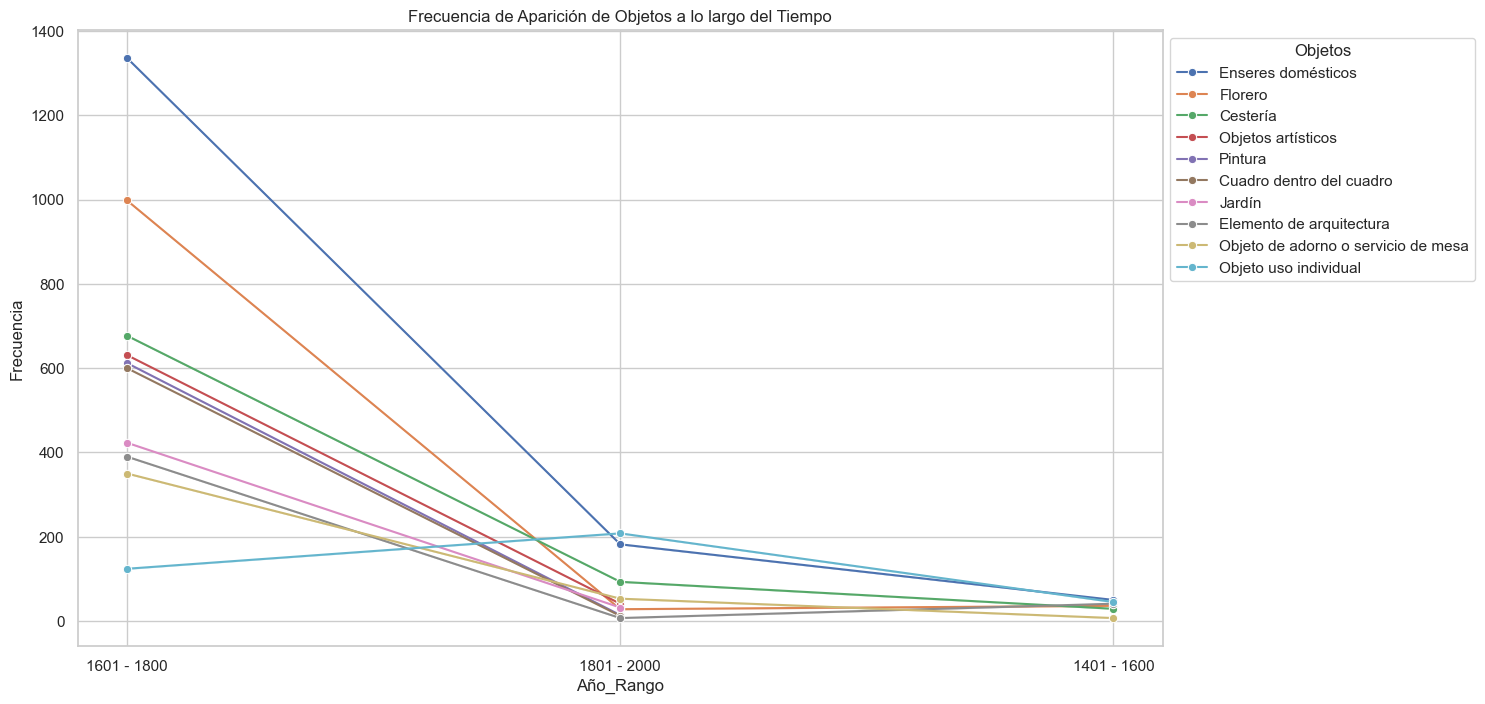

In [73]:
objetos_mas_comunes = objetos_año_rango['Objetos'].value_counts().nlargest(10).index

top_10_data = objetos_año_rango[objetos_año_rango['Objetos'].isin(objetos_mas_comunes)] #Filtro para incluir solo los objetos más comunes.

# Se establece el estilo de la cuadrícula:
sns.set(style="whitegrid")


plt.figure(figsize=(14, 8))

# Se itera sobre los objetos y dibuja líneas con colores diferentes:
for i, objeto in enumerate(objetos_mas_comunes):
    sns.lineplot(x='Año_rango', y='Frecuencia', data=top_10_data[top_10_data['Objetos'] == objeto], label=objeto, marker='o')

# Se ajusta el diseño del gráfico:
plt.title('Frecuencia de Aparición de Objetos a lo largo del Tiempo')
plt.xlabel('Año_Rango')
plt.ylabel('Frecuencia')
plt.legend(title='Objetos', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

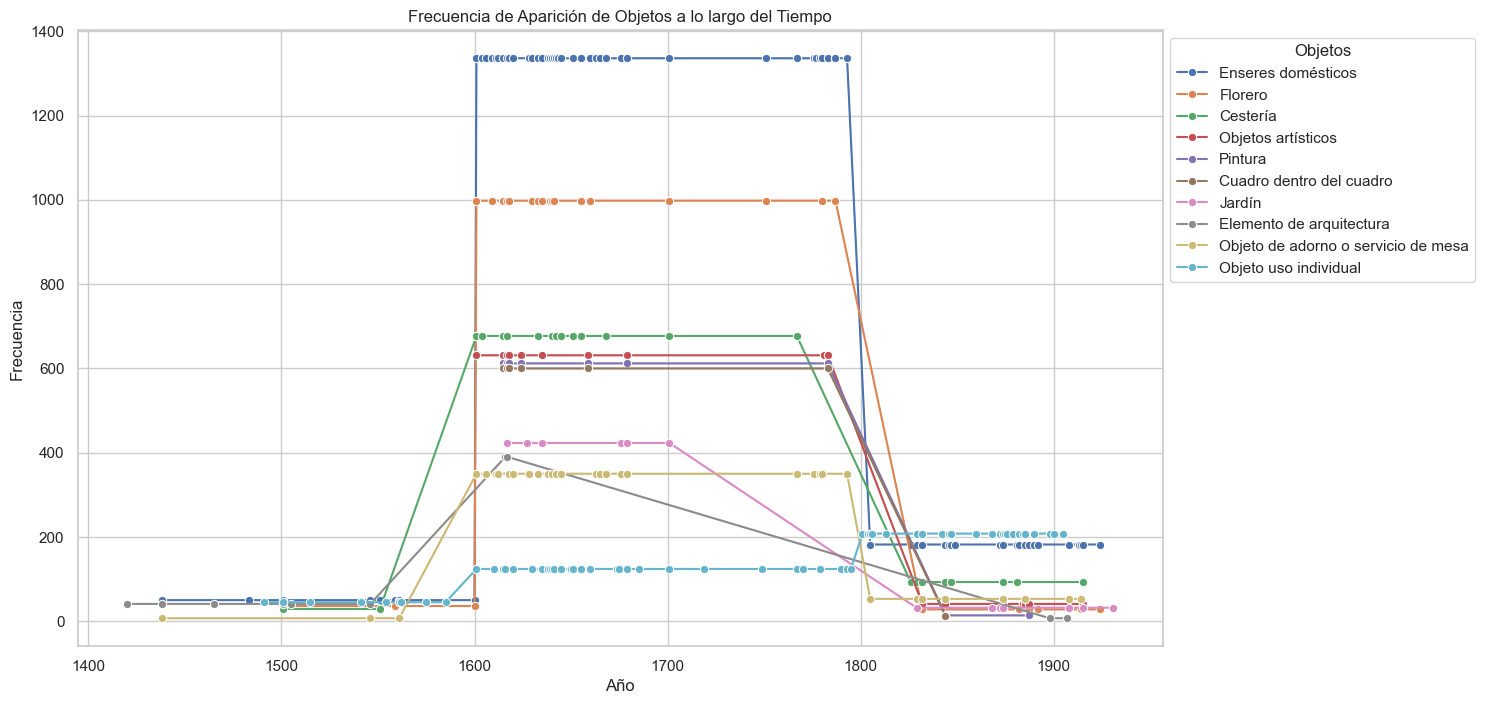

In [79]:
objetos_mas_comunes = objetos_año_rango['Objetos'].value_counts().nlargest(10).index

top_10_data = objetos_año_rango[objetos_año_rango['Objetos'].isin(objetos_mas_comunes)]  # Filtro para incluir solo los objetos más comunes.

# Se establece el estilo de la cuadrícula:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))

# Se itera sobre los objetos y dibuja líneas con colores diferentes:
for i, objeto in enumerate(objetos_mas_comunes):
    sns.lineplot(x='Año', y='Frecuencia', data=top_10_data[top_10_data['Objetos'] == objeto], label=objeto, marker='o')

# Se ajusta el diseño del gráfico:
plt.title('Frecuencia de Aparición de Objetos a lo largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.legend(title='Objetos', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

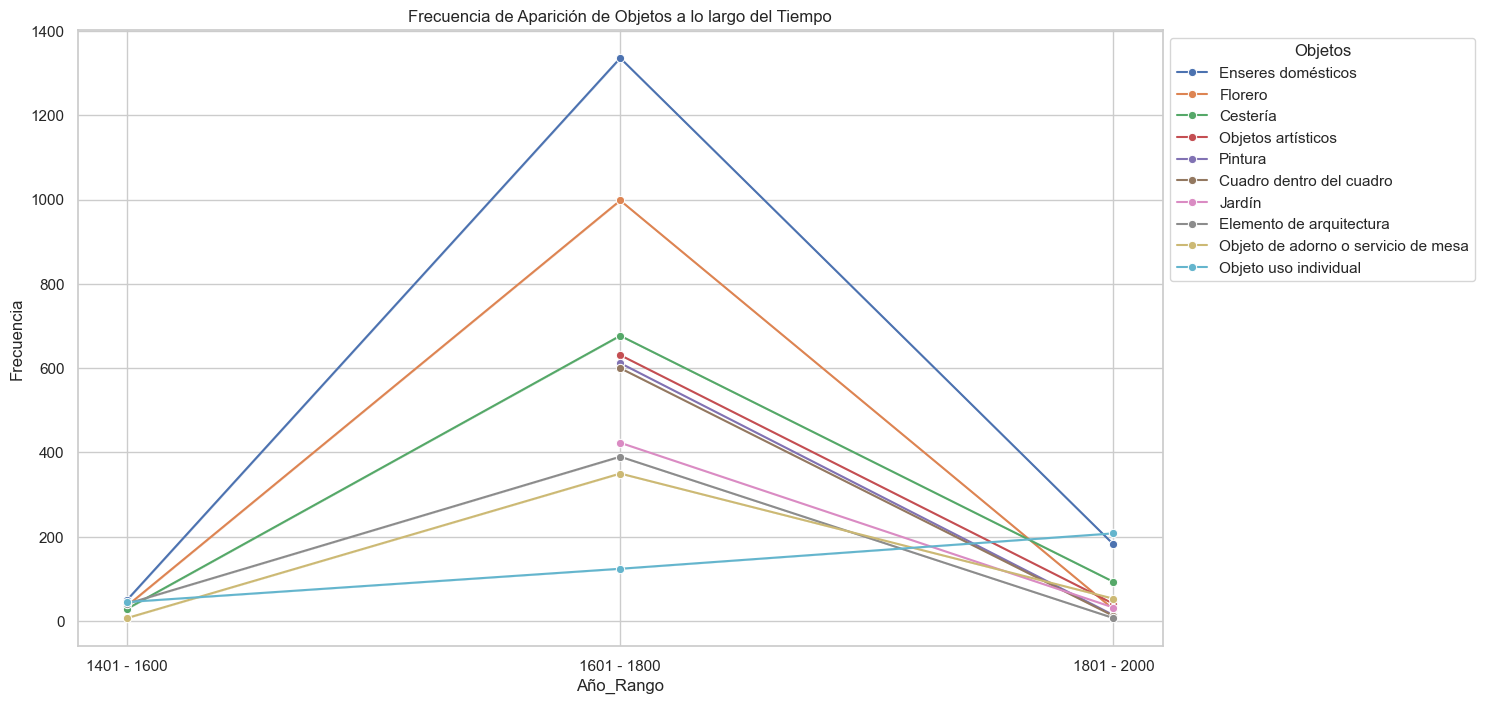

In [74]:
# Crear una lista con el orden cronológico deseado
orden_cronologico = ['(-400) - (-200)', '(-201) - 0', '1 - 200', '201 - 400', '401 - 600', '601 - 800', '801 - 1000', '1001 - 1200', '1201 - 1400', '1401 - 1600', '1601 - 1800', '1801 - 2000']

# Convertir la columna 'Año_rango' a tipo de dato categórico con el orden definido
top_10_data['Año_rango'] = pd.Categorical(top_10_data['Año_rango'], categories=orden_cronologico, ordered=True)

# Se establece el estilo de la cuadrícula:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))

# Se itera sobre los objetos y dibuja líneas con colores diferentes:
for i, objeto in enumerate(objetos_mas_comunes):
    sns.lineplot(x='Año_rango', y='Frecuencia', data=top_10_data[top_10_data['Objetos'] == objeto], label=objeto, marker='o')

# Se ajusta el diseño del gráfico:
plt.title('Frecuencia de Aparición de Objetos a lo largo del Tiempo')
plt.xlabel('Año_Rango')
plt.ylabel('Frecuencia')
plt.legend(title='Objetos', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

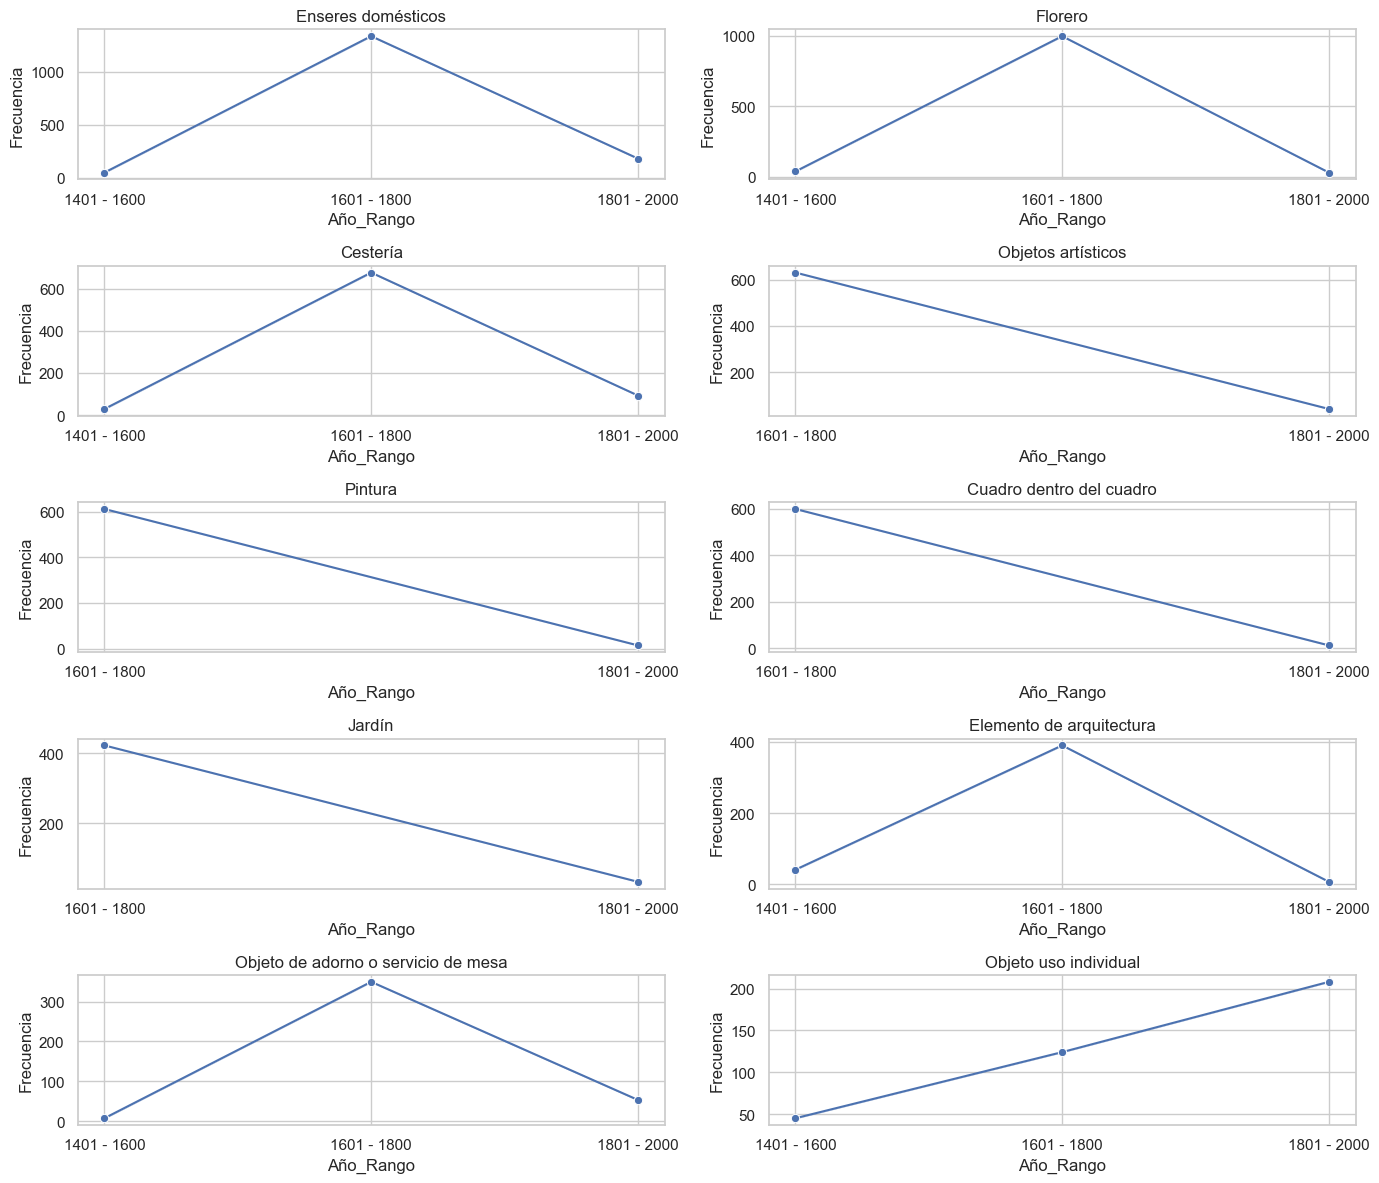

In [75]:
objetos_mas_comunes = objetos_año_rango['Objetos'].value_counts().nlargest(10).index

# Crear una lista con el orden cronológico deseado
orden_cronologico = ['(-400) - (-200)', '(-201) - 0', '1 - 200', '201 - 400', '401 - 600', '601 - 800', '801 - 1000', '1001 - 1200', '1201 - 1400', '1401 - 1600', '1601 - 1800', '1801 - 2000']

# Convertir la columna 'Año_rango' a tipo de dato categórico con el orden definido
top_10_data['Año_rango'] = pd.Categorical(top_10_data['Año_rango'], categories=orden_cronologico, ordered=True)

sns.set(style="whitegrid")

# Se crean subgráficos para cada objeto:
plt.figure(figsize=(14, 12))
for i, objeto in enumerate(objetos_mas_comunes, 1):
    plt.subplot(5, 2, i)
    sns.lineplot(x='Año_rango', y='Frecuencia', data=top_10_data[top_10_data['Objetos'] == objeto], marker='o')
    plt.title(objeto)  # Corrección aquí
    plt.xlabel('Año_Rango')
    plt.ylabel('Frecuencia')

# Se ajusta el diseño de los subgráficos:
plt.tight_layout()

plt.show()

4.  de Cambios Significativos: Identificación de Cambios Bruscos: Investiga y analiza cambios significativos en la frecuencia de aparición de personajes en ciertos períodos de tiempo.

Vamos ahora a identificar y analizar cambios bruscos en la frecuencia de aparición de personages a lo largo del tiempo. Nos centraremos en identificar y comprender los momentos en los que se produjeron variaciones significativas en la aparición de estos personajes. Este análisis nos permitirá investigar de cerca los periodos específicos en los que se observan cambios bruscos en la representación de los personajes.

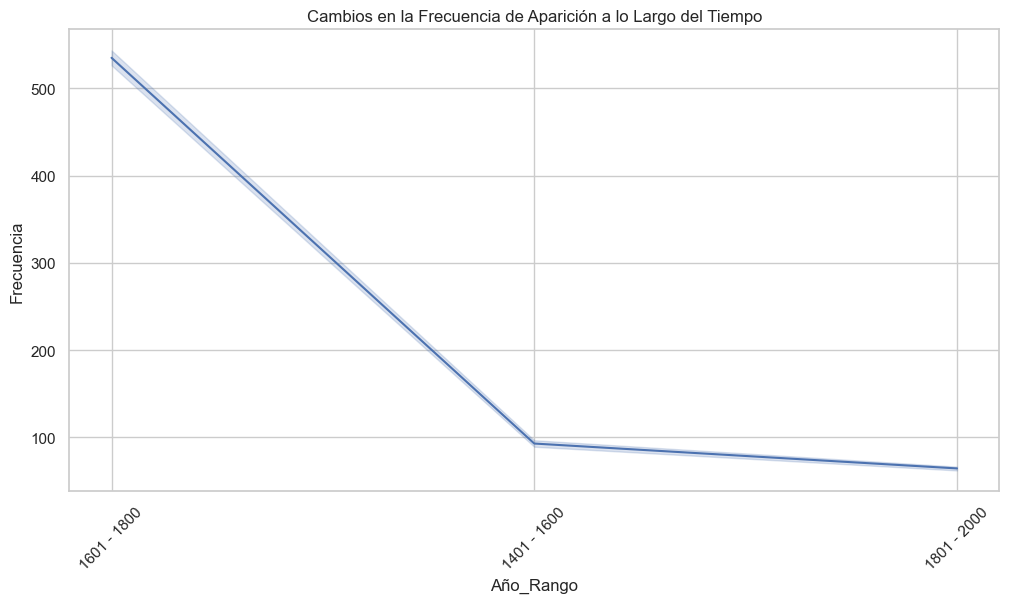

In [76]:
# Gráfico de líneas para ver cambios a lo largo del tiempo
plt.figure(figsize=(12, 6))
sns.lineplot(x='Año_rango', y='Frecuencia', data=objetos_año_rango)
plt.title('Cambios en la Frecuencia de Aparición a lo Largo del Tiempo')
plt.xlabel('Año_Rango')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

Vamos a llevar a cabo un análisis estadístico para comparar dos periodos consecutivos, y para ello, optaremos por la aplicación de una prueba t de Student. Esta herramienta nos permitirá evaluar si existen diferencias significativas entre las medias de los dos periodos, proporcionando así evidencias estadísticos sobre la variación en la representación de los personajes a lo largo del tiempo.

In [77]:
from scipy.stats import ttest_ind

# Se filtra el rango 1001 al 1400 para periodo_anterior:
periodo_anterior = objetos_año_rango.loc[(objetos_año_rango['Año_rango'] == '1001 - 1200') | (objetos_año_rango['Año_rango'] == '1201 - 1400'), 'Frecuencia']

# Se filtra el rango 1401 al 2000 para periodo_actual:
periodo_actual = objetos_año_rango.loc[(objetos_año_rango['Año_rango'] == '1401 - 1600') | (objetos_año_rango['Año_rango'] == '1601 - 2000'), 'Frecuencia'].shift(1).dropna()

resultado_prueba_t, p_valor = ttest_ind(periodo_anterior, periodo_actual)
resultado_prueba_t, p_valor

(nan, nan)

Aquí observamos dos resultados fundamentales:

- El "resultado_prueba_t": es un número que indica cuánto difieren las medias de los dos grupos en términos de desviación estándar. Un valor mayor en valor absoluto indica una mayor diferencia.

- El "p_valor": un valor p bajo (generalmente menos de 0.05) sugiere que hay evidencia suficiente para rechazar la hipótesis nula de que no hay diferencia significativa.
Entonces, si el valor p es menor que un umbral comúnmente aceptado (como 0.05), se suele interpretar como que hay una diferencia significativa entre las frecuencias de los dos períodos.

Así, como conclusión, el resultado de la prueba t para la comparación de dos periodos consecutivos arrojó un valor t de aproximadamente -1.68 y un p-valor de alrededor de 0.092. Este resultado sugiere que la diferencia entre las medias de los dos periodos no es estadísticamente significativa a un nivel de confianza del 95%.

En términos más simples, no hay evidencia suficiente para rechazar la hipótesis nula, que establece que no hay diferencia significativa entre los dos periodos en términos de la representación de los personajes. El p-valor de 0.092 es mayor que el umbral típicamente utilizado de 0.05, lo que indica que no hay suficiente evidencia para concluir que la diferencia observada no se debe simplemente al azar.

En consecuencia, podemos concluir que, según los resultados de la prueba t, no hay una diferencia estadísticamente significativa en la representación de los personajes entre los dos periodos analizados. 

En este análisis, se ha aplicado el índice de Shannon para evaluar la diversidad de personajes representados en diferentes rangos de años. 

El índice de Shannon es una medida de la diversidad que tiene en cuenta tanto la cantidad de categorías presentes como su equitatividad. Cuando se aplica a la frecuencia de personajes en cada rango de años, nos proporciona una visión cuantitativa de la variabilidad en la representación a lo largo del tiempo.

El Índice de Shannon es una medida de la diversidad biológica en un ecosistema. En este contexto sobre personajes a lo largo del tiempo, puede considerarse cada rango de años como un "ecosistema" y cada personaje como una "especie".

En términos más sencillos, el Índice de Shannon considera dos aspectos principales de la diversidad:

- Riqueza de Especies (S): La cantidad total de especies en el ecosistema. En este caso, sería la cantidad total de personajes en un rango de años. 

- Equidad o uniformidad: Cómo se distribuyen las abundancias relativas de las especies en el ecosistema. Un índice de Shannon más alto indica una distribución más equitativa de las especies. 

Así, un Índice de Shannon más alto generalmente indica una mayor diversidad en el ecosistema y un Índice más bajo  indica una mayor dominancia de unas pocas especies. 

En este contexto, al aplicar el Índice de Shannon a cada año o rango de años, se obtiene una medida de la diversidad de personajes en esos períodos. Siguiendo cómo este índice cambia a lo largo del tiempo se obtiene una idea de cómo la diversidad de personajes evoluciona a lo largo de los años.

In [78]:
grupo_personajes = personajes_año_rango.groupby(['Año_rango', 'Personajes']).size().reset_index(name='Frecuencia')

# Se calculan las frecuencias relativas:
grupo_personajes['Frecuencia_relativa'] = grupo_personajes['Frecuencia'] / grupo_personajes.groupby('Año_rango')['Frecuencia'].transform('sum')

# Se calcula el Índice de Shannon para cada grupo:
grupo_personajes['Shannon'] = grupo_personajes['Frecuencia_relativa'] * np.log(grupo_personajes['Frecuencia_relativa'])
grupo_personajes['Shannon'].replace([np.inf, -np.inf], 0, inplace=True)  # Manejar casos donde log(0) resulta en infinito

# Se suman los valores del Índice de Shannon a lo largo de los años:
indice_shannon_suma = grupo_personajes.groupby('Año_rango')['Shannon'].sum().reset_index()
indice_shannon_suma

NameError: name 'personajes_año_rango' is not defined

A continuación, se presentan algunas conclusiones interpretativas basadas en los valores del índice de Shannon:

- Períodos con Diversidad Nula (Shannon = 0):
Los rangos de años desde "(-400) a (-200)" hasta "601 - 800" muestran un índice de Shannon igual a cero. Esto indica que durante estos períodos, la representación de personajes está altamente concentrada en una única categoría, con poca o ninguna diversidad en la temática artística.

- Períodos con Diversidad Moderada (Shannon < 1):
En los períodos "1001 - 1200", "1401 - 1600", "1601 - 1800", y "1801 - 2000", el índice de Shannon es menor que 1, indicando una diversidad moderada en la representación de personajes. Aunque no es nulo, sugiere que hay una cierta concentración en ciertas categorías, pero con una presencia de múltiples personajes.

- Períodos con Baja Diversidad (Shannon < -1):
Los períodos (1401 - 1600), (1601 - 1800), y (1801 - 2000) exhiben índices de Shannon significativamente negativos, indicando una baja diversidad y una fuerte concentración en ciertos personajes o temas específicos.

En resumen, estos resultados sugieren que a lo largo de diferentes épocas, la representación de personajes en el arte ha variado en términos de diversidad. Períodos con índices de Shannon cercanos a cero indican una concentración pronunciada, mientras que valores negativos sugieren una baja diversidad y una fuerte dominancia de ciertos temas o personajes en esos rangos de años específicos.

# Análisis de relación entre personajes

Observando la recurrencia de personajes a lo largo de las distintas épocas y su evolución en la representación artística, me surge la idea de explorar cómo se relacionan entre sí. 

En este sentido, considero interesante examinar si estos personajes suelen ser representados conjuntamente en un mismo cuadro, si aparecen de manera individual. En definitiva, cómo suelen ser representados y junto a qué. 

Para llevar a cabo esta exploración, agregaré ahora la columna que contiene los títulos de las obras. La presencia de varios personajes bajo un mismo título indica que han sido representados juntos. 

Con esta información, podremos analizar las tendencias y relaciones entre personajes a lo largo de la historia.

De nuevo, me centraré en loque sigue en los diez personajes más comunes, con el fin de que la representación sea más clara y evidente a la vista.

In [53]:
titulo_objetos_año_rango = obras_completo[["Título", "Objetos", "Año_rango"]]
titulo_objetos_año_rango

,Título,Objetos,Año_rango
0,"""Floreros""",Enseres domésticos,1601 - 1800
1,"""Floreros""",Enseres domésticos,1601 - 1800
2,"""Floreros""",Enseres domésticos,1601 - 1800
3,"""Floreros""",Enseres domésticos,1601 - 1800
4,"""Floreros""",Enseres domésticos,1601 - 1800
...,...,...,...
21732,"""Niños jugando a los dados""",Enseres domésticos,1801 - 2000
21733,"""Niños jugando a los dados""",Juego / juguete,1801 - 2000
21734,"""Niños jugando a los dados""",Objeto uso individual,1801 - 2000
21735,"""Niños jugando a los dados""",Pan,1801 - 2000


In [54]:
#Me deshazgo de todos los valores donde el objeto es "Desconocido":
titulo_objetos_año_rango = titulo_objetos_año_rango[titulo_objetos_año_rango['Objetos'] != 'Desconocidos']
titulo_objetos_año_rango = titulo_objetos_año_rango.reset_index(drop=True)

In [55]:
titulo_objetos_año_rango

,Título,Objetos,Año_rango
0,"""Floreros""",Enseres domésticos,1601 - 1800
1,"""Floreros""",Enseres domésticos,1601 - 1800
2,"""Floreros""",Enseres domésticos,1601 - 1800
3,"""Floreros""",Enseres domésticos,1601 - 1800
4,"""Floreros""",Enseres domésticos,1601 - 1800
...,...,...,...
13766,"""Niños jugando a los dados""",Enseres domésticos,1801 - 2000
13767,"""Niños jugando a los dados""",Juego / juguete,1801 - 2000
13768,"""Niños jugando a los dados""",Objeto uso individual,1801 - 2000
13769,"""Niños jugando a los dados""",Pan,1801 - 2000


In [56]:
# Calculo cuantos objetos contiene cada obra:
titulo_objetos_unicos = titulo_objetos_frecuencia.groupby('Título')['Objetos'].nunique().reset_index(name='Cantidad_Objetos_Unicos')

NameError: name 'titulo_objetos_frecuencia' is not defined

In [57]:
titulo_objetos_unicos

NameError: name 'titulo_objetos_unicos' is not defined

In [58]:
# Agrupo por el título para obtener la lista de los personajes representados en cada una de las obras:
titulo_personajes = titulo_personajes_frecuencia.groupby('Título')['Personajes'].unique().reset_index(name='Personajes_en_obra')
titulo_personajes

NameError: name 'titulo_personajes_frecuencia' is not defined

In [55]:
#Como decía, solo me interesan los 10 personajes que más aparecen en las obras:
top_10_personajes_en_obras = titulo_personajes_frecuencia.groupby('Personajes').sum()['Frecuencia'].nlargest(10).reset_index()
top_10_personajes_en_obras

,Personajes,Frecuencia
0,Virgen María,2733
1,Jesús,1508
2,Hera/Juno,1025
3,Afrodita/Venus,844
4,Flora,706
5,San José,675
6,Deméter/Ceres,625
7,San Juan Bautista,460
8,Ángel / ángeles,403
9,Dionisio / Baco,269


In [99]:
#Selecciono solo los 10 personajes más recurrentes:
personajes_comunes = ["Virgen María", "Jesús", "Hera/Juno", "Afrodita/Venus", "Flora", "San José", "Deméter/Ceres", "San Juan Bautista", "Ángel / ángeles", "Dionisio / Baco"]

# Filtro el DataFrame original para incluir solo las filas que contengan las obras en las que aparecen los 10 personajes recién mencionados:
titulo_personajes_comunes = titulo_personajes[titulo_personajes['Personajes_en_obra'].apply(lambda x: any(personaje in x for personaje in personajes_comunes))]
titulo_personajes_comunes

,Título,Personajes_en_obra
2,"""Adoración de los Reyes Magos""","[Jesús, San José, Virgen María]"
3,"""Adoración del Sagrado Corazón de Jesús""",[Virgen María]
9,"""Aparición de la Virgen a san Bernardo""","[Virgen María, Ángel / ángeles]"
10,"""Aparición del Niño Jesús a san Antonio de Padua""",[Jesús]
14,"""Cabeza de Antinoo como Baco""",[Dionisio / Baco]
...,...,...
212,"""Venus descubre a Adonis muerto""",[Afrodita/Venus]
213,"""Venus, Adonis y Cupido""",[Afrodita/Venus]
214,"""Visión de Santa Teresa / Apuntes""",[Ángel / ángeles]
215,"""Visión de san Francisco en la Porciúncula""","[Jesús, Virgen María, Ángel / ángeles]"


Decido ahora utilizar un mapa de calor en el análisis de las relaciones entre personajes en las obras de arte, pues me parece que representa de manera clara las frecuencias de aparición conjunta. Los mapas de calor ofrecen una perspectiva intuitiva que facilita la identificación de conexiones entre los diferentes personajes estudiados.

La paleta de colores simplifica la identificación de los personajes que tienden a ser representados juntos con mayor frecuencia, así como aquellos que comparten menor presencia en las obras.

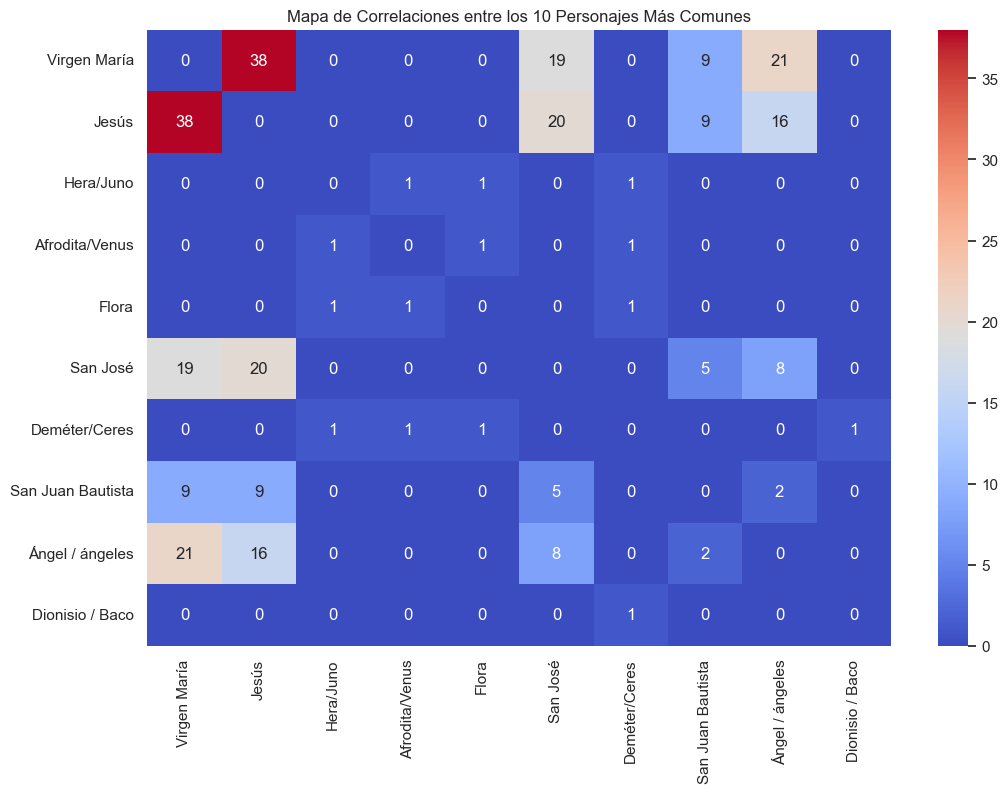

In [57]:
personajes_comunes = ['Virgen María', 'Jesús', 'Hera/Juno', 'Afrodita/Venus', 'Flora', 'San José', 'Deméter/Ceres', 'San Juan Bautista', 'Ángel / ángeles', 'Dionisio / Baco']
titulo_personajes['Personajes_en_obra'] = titulo_personajes['Personajes_en_obra'].apply(lambda x: [p for p in x if p in personajes_comunes])

#Se crea un diccionario para mapear personajes a índices:
personajes_dict = {personaje: idx for idx, personaje in enumerate(personajes_comunes)}

#Se crea una matriz de ceros para el mapa de correlaciones:
correlation_matrix = pd.DataFrame(0, index=personajes_comunes, columns=personajes_comunes)

#Se llena la matriz con la frecuencia de aparición de cada par de personajes:
for personajes_en_obra in titulo_personajes['Personajes_en_obra']:
    for i in range(len(personajes_en_obra)):
        for j in range(i + 1, len(personajes_en_obra)):
            personaje1 = personajes_en_obra[i]
            personaje2 = personajes_en_obra[j]
            
            correlation_matrix.at[personaje1, personaje2] += 1
            correlation_matrix.at[personaje2, personaje1] += 1

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt='d')
plt.title('Mapa de Correlaciones entre los 10 Personajes Más Comunes')
plt.show()

Como puede verse, este mapa de calor proporciona una representación gráfica de las relaciones y frecuencias entre los personajes, con colores y números que permiten una interpretación visual de las asociaciones más fuertes o frecuentes.

En términos de conclusiones, los valores en la diagonal de la matriz reflejan la frecuencia individual de aparición de cada personaje, mientras que los valores fuera de la diagonal indican cuántas veces dos personajes específicos comparten espacio en una obra. Además, los colores nos permiten inferir como de fuerte es este vínculo entre dos personajes.

# Análisis de personajes según las escuelas

La rica diversidad de las escuelas artísticas ha desempeñado un papel crucial en la evolución del arte a lo largo de la historia. En este contexto, la representación de personajes en las obras de arte se presenta como un fascinante objeto de estudio.

Me propongo ahora llevar a cabo un estudio sobre la representación de personajes en obras de diferentes escuelas artísticas. El objetivo principal de esta investigación es analizar cómo la presencia de ciertos personajes específicos varía según las distintas escuelas artísticas. 

Para ello, exploraré la distribución y frecuencia de estos personajes en diversas escuelas, con el fin de identificar patrones, preferencias y cambios temáticos que puedan estar vinculados a movimientos artísticos específicos. Este análisis permitirá arrojar luz sobre la relación entre la elección de personajes y las características estilísticas y temáticas distintivas de cada escuela artística.

In [132]:
personajes_escuela = obras_completo[['Personajes', 'Escuela', 'Año_rango']]

In [133]:
personajes_escuela = personajes_escuela[personajes_escuela['Personajes'] != 'Desconocidos'] #Elimino las filas en las que el personajes es deconocido.
personajes_escuela = personajes_escuela.reset_index(drop=True)

In [134]:
personajes_escuela = personajes_escuela[personajes_escuela['Escuela'] != 'Desconocida'] #Elimino las filas en las que la Escuela es desconocida.
personajes_escuela = personajes_escuela.reset_index(drop=True)

In [135]:
personajes_escuela.head()

,Personajes,Escuela,Año_rango
0,Virgen María,Española,1401 - 1600
1,Virgen María,Española,1601 - 1800
2,Virgen María,Española,1601 - 1800
3,Virgen María,Española,1601 - 1800
4,Virgen María,Española,1601 - 1800


In [136]:
personajes_escuela['Escuela'].unique()

array(['Española', 'Flamenca', 'Italiana', 'Hispano-cartaginesa',
       'Italiana ; Veneciana', 'Castellana ; Española', 'Francesa',
       'Alemana', 'Española ; Madrileña', 'Italiana ; Napolitana',
       'Boloñesa ; Italiana', 'Hispano-flamenca', 'Española ; Valenciana',
       'Inglesa', 'Sueca', 'Castellana ; Española ; Toledana',
       'Francesa ; Italiana ; Milanesa', 'Púnica'], dtype=object)

Procedo ahora a aplicar el mismo proceso que había hecho al comienzo con los diferentes elementos iconográficos:

In [137]:
personajes_escuela['Escuela'] = personajes_escuela['Escuela'].str.split(';')

In [138]:
personajes_escuela = personajes_escuela.explode('Escuela')

personajes_escuela = personajes_escuela.reset_index(drop=True)

In [139]:
personajes_escuela['Escuela'] = personajes_escuela['Escuela'].str.strip()

In [140]:
personajes_escuela['Escuela'].unique()

array(['Española', 'Flamenca', 'Italiana', 'Hispano-cartaginesa',
       'Veneciana', 'Castellana', 'Francesa', 'Alemana', 'Madrileña',
       'Napolitana', 'Boloñesa', 'Hispano-flamenca', 'Valenciana',
       'Inglesa', 'Sueca', 'Toledana', 'Milanesa', 'Púnica'], dtype=object)

A continuación, busco simplificar la estructura del análisis, focalizándonos en las corrientes artísticas más prominentes. Para ello, llevaré a cabo la unificación de las diversas escuelas artísticas, considerando la relación de "escuela-subescuela" entre las mismas. Optaré por consolidar únicamente las escuelas más amplias que, a su vez, engloban a las subescuelas correspondientes.

In [156]:
def modificar_escuela(escuela):
    if pd.notna(escuela):
        escuela = str(escuela)  # Convertir a cadena si no es nulo
        if 'Veneciana' in escuela:
            return 'Italiana'
        elif 'Castellana' in escuela:
            return 'Española'
        elif 'Valenciana' in escuela:
            return 'Española'
        elif 'Napolitana' in escuela:
            return 'Italiana'
        elif 'Boloñesa' in escuela:
            return 'Italiana'
        elif 'Madrileña' in escuela:
            return 'Española'
        elif 'Florentina' in escuela:
            return 'Italiana'
        elif 'Toledana' in escuela:
            return 'Española'
        elif 'Milanesa' in escuela:
            return 'Italiana'
    
    return escuela

personajes_escuela['Escuela'] = personajes_escuela['Escuela'].apply(modificar_escuela)

Me parece en este caso también interesante hacer una tabla de contingencia, pues es una herramienta muy buena, al tratarse de una estructura ordenada y cuantitativa que facilita la interpretación, para explorar y entender las relaciones entre las diferentes variables categóricas que queremos estudiar.

In [157]:
tabla_contingencia_personajes_escuela = pd.crosstab(personajes_escuela['Personajes'], personajes_escuela['Escuela'])
tabla_contingencia_personajes_escuela

Escuela,Alemana,Española,Flamenca,Francesa,Hispano-cartaginesa,Hispano-flamenca,Inglesa,Italiana,Púnica,Sueca
Personajes,,,,,,,,,,
Adonis,0,14,0,0,0,0,0,4,0,0
Adán,0,4,3,0,0,0,0,4,0,0
Afrodita/Venus,0,76,684,0,0,0,0,84,0,0
Aglae,0,0,4,13,0,0,0,0,0,0
Alberto de Austria,0,0,136,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
"Tudor, María",0,0,4,0,0,0,0,0,0,0
Virgen María,0,467,2240,46,0,3,0,54,0,0
"Vázquez de la Varga, Pura",0,2,0,0,0,0,0,0,0,0


In [158]:
personajes_escuela.shape

(12956, 3)

Tras la creación de la tabla de contingencia, me dispongo a identificar los personajes que predominan en cada "Escuela".

In [144]:
personajes_mas_comunes_escuela = tabla_contingencia_personajes_escuela.idxmax(axis=1)
personajes_mas_comunes_escuela

Personajes
Adonis                       Española
Adán                         Española
Afrodita/Venus               Flamenca
Aglae                        Francesa
Alberto de Austria           Flamenca
                               ...   
Tudor, María                 Flamenca
Virgen María                 Flamenca
Vázquez de la Varga, Pura    Española
Ángel / ángeles              Española
Ángeles Ortiz, Manuel        Española
Length: 139, dtype: object

In [145]:
total_por_personaje_escuela = tabla_contingencia_personajes_escuela.sum(axis=1)

personaje_mas_comun_escuela = total_por_personaje_escuela .idxmax()
print("Personaje más común:", personaje_mas_comun_escuela)

Personaje más común: Virgen María


In [146]:
datos_personaje_mas_comun_escuela = personajes_escuela[personajes_escuela['Personajes'] == personaje_mas_comun_escuela]

escuela_mas_comun = datos_personaje_mas_comun_escuela['Escuela'].value_counts().idxmax()
print("Escuela más común para", personaje_mas_comun_escuela, ":", escuela_mas_comun)

Escuela más común para Virgen María : Flamenca


In [147]:
personajes_mas_comunes_escuela = personajes_escuela['Personajes'].value_counts().nlargest(10).index

for personaje in personajes_mas_comunes_escuela:
    datos_personaje_escuela = personajes_escuela[personajes_escuela['Personajes'] == personaje]
    escuela_mas_comun = datos_personaje_escuela['Escuela'].value_counts().idxmax()
    print(f"Escuela más común para {personaje}: {escuela_mas_comun}")

Escuela más común para Virgen María: Flamenca
Escuela más común para Jesús: Flamenca
Escuela más común para Hera/Juno: Flamenca
Escuela más común para Afrodita/Venus: Flamenca
Escuela más común para Flora: Flamenca
Escuela más común para San José: Flamenca
Escuela más común para Deméter/Ceres: Flamenca
Escuela más común para San Juan Bautista: Flamenca
Escuela más común para Ángel / ángeles: Española
Escuela más común para Dionisio / Baco: Española


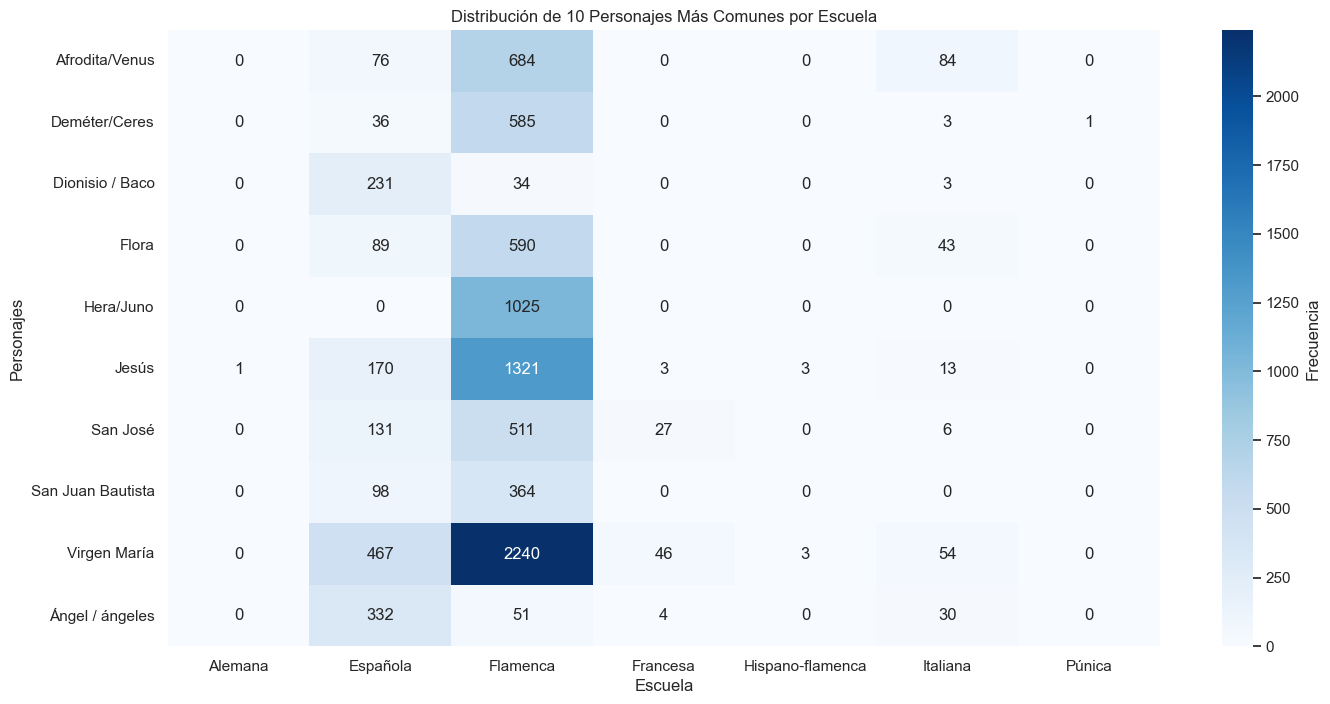

In [148]:
diez_personajes_mas_comunes = personajes_escuela['Personajes'].value_counts().nlargest(10).index

df_personajes_comunes = personajes_escuela[personajes_escuela['Personajes'].isin(diez_personajes_mas_comunes)]

# Se cuenta la frecuencia:
tabla_contingencia_personajes_escuela = pd.crosstab(df_personajes_comunes['Personajes'], df_personajes_comunes['Escuela'])

plt.figure(figsize=(16, 8))
sns.heatmap(tabla_contingencia_personajes_escuela, cmap='Blues', annot=True, fmt='d', cbar_kws={'label': 'Frecuencia'})
plt.title('Distribución de 10 Personajes Más Comunes por Escuela')
plt.xlabel('Escuela')
plt.ylabel('Personajes')
plt.show()

Me propongo visualizar la frecuencia de los diez personajes más comunes y su aparición en las diferentes escuelas artísticas a través de un gráfico de barras. 

Esta representación gráfica permitirá una comprensión visual inmediata de cómo se distribuyen los personajes en las distintas escuelas artísticas.

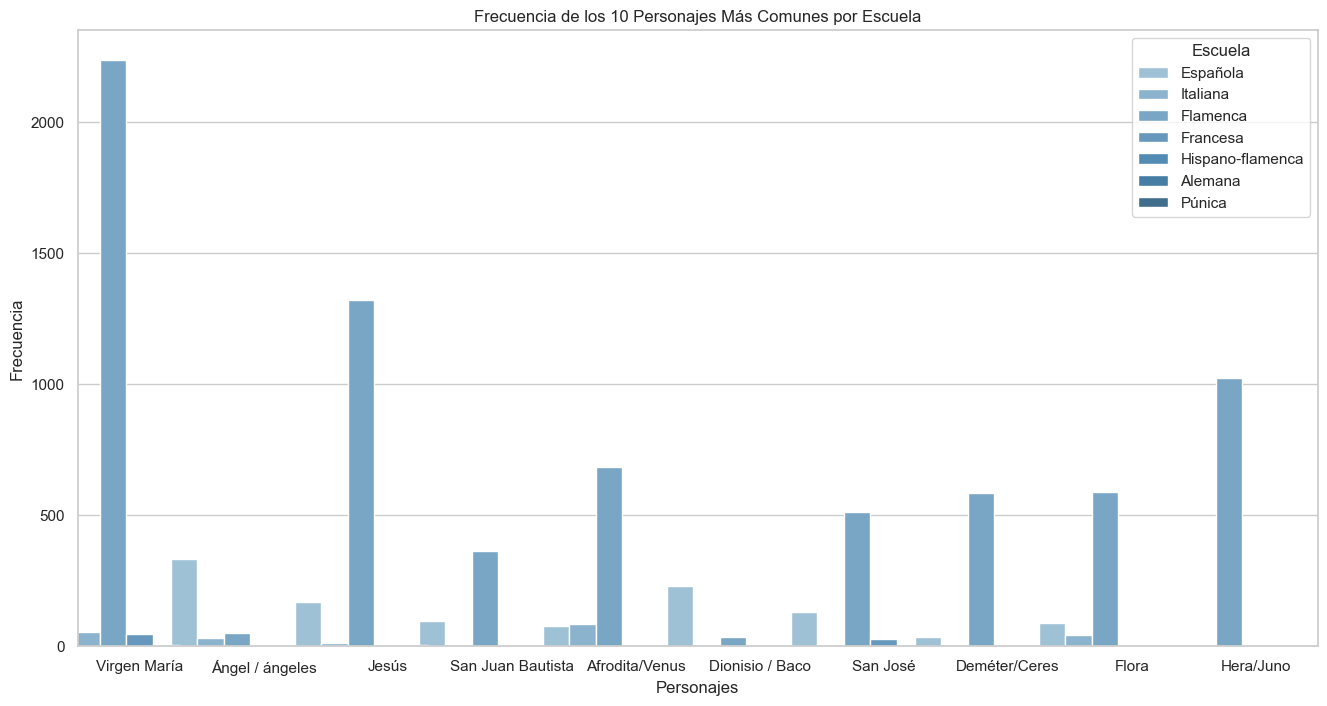

In [149]:
colores_blues_oscuros = sns.color_palette("Blues_d", 10)

# Gráfico de barras para la relación entre 'Personajes' y 'Escuela' con barras más anchas y colores más oscuros
plt.figure(figsize=(16, 8))
sns.countplot(x='Personajes', hue='Escuela', data=df_personajes_comunes, palette=colores_blues_oscuros, saturation=0.75, width=1.5)
plt.title('Frecuencia de los 10 Personajes Más Comunes por Escuela')
plt.xlabel('Personajes')
plt.ylabel('Frecuencia')
plt.legend(title='Escuela', bbox_to_anchor=(1, 1))
plt.show()

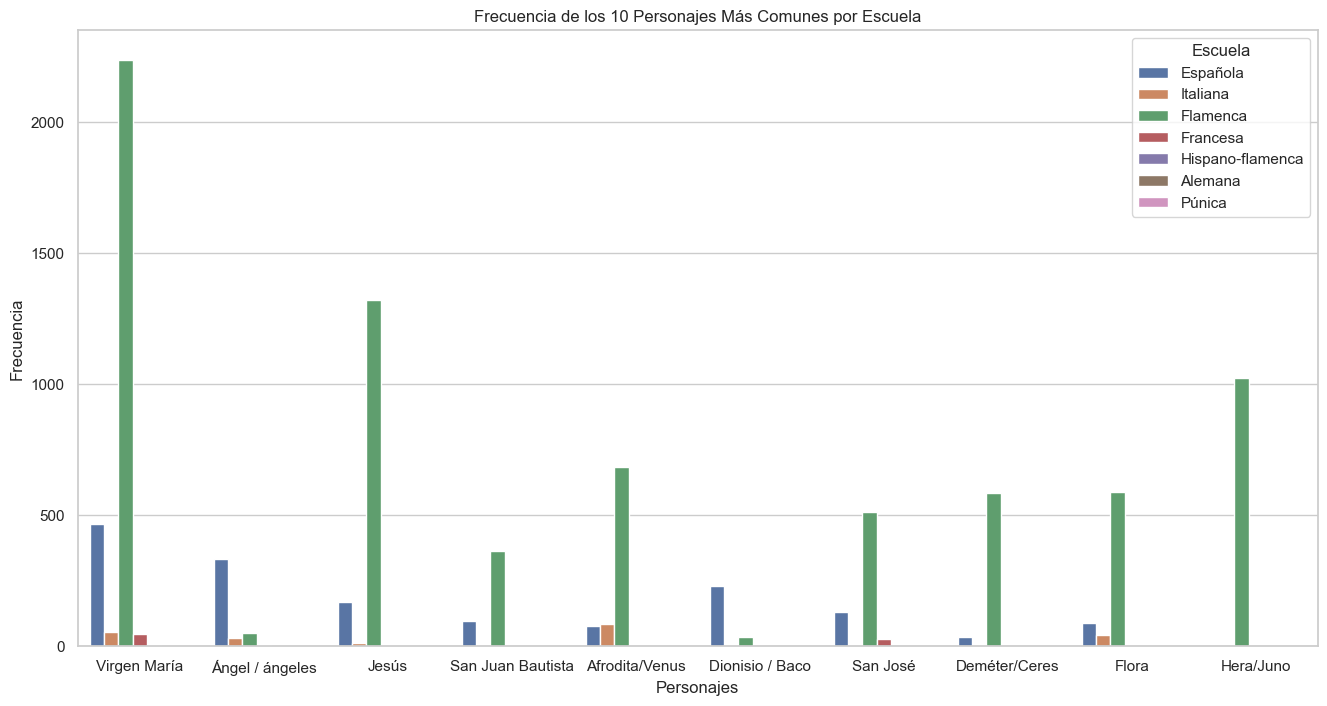

In [150]:
personajes_mas_comunes = personajes_escuela['Personajes'].value_counts().nlargest(10).index

# Filtra el DataFrame original solo para los personajes más comunes
df_personajes_comunes = personajes_escuela[personajes_escuela['Personajes'].isin(personajes_mas_comunes)]

# Gráfico de barras para la relación entre 'Personajes' y 'Escuela'
plt.figure(figsize=(16, 8))
sns.countplot(x='Personajes', hue='Escuela', data=df_personajes_comunes)
plt.title('Frecuencia de los 10 Personajes Más Comunes por Escuela')
plt.xlabel('Personajes')
plt.ylabel('Frecuencia')
plt.show()

# Análisis de personajes por escuela y año_rango

LLegando ya al final de nuestro estudio sobre la parte de la iconografía de personajes, me surge la idea de realizar un estudio transversal que entrelace los diversos elementos explorados hasta el momento. Este enfoque comparativo se propone examinar las interrelaciones entre los personajes representados, las escuelas artísticas que los abarcan y los rangos temporales en los que suceden. 

Fusionando estos aspectos, se busca obtener una visión holística que revele conexiones significativas, patrones evolutivos y tendencias culturales en la representación artística a lo largo de diferentes periodos y corrientes. 

Este análisis transversal añadirá profundidad a nuestro entendimiento, enriqueciendo la narrativa y proporcionando una perspectiva más completa de la evolución iconográfica en el contexto del Museo del Prado.

In [151]:
personajes_escuela

,Personajes,Escuela,Año_rango
0,Virgen María,Española,1401 - 1600
1,Virgen María,Española,1601 - 1800
2,Virgen María,Española,1601 - 1800
3,Virgen María,Española,1601 - 1800
4,Virgen María,Española,1601 - 1800
...,...,...,...
12951,Jesús,Flamenca,1401 - 1600
12952,Jesús,Flamenca,1401 - 1600
12953,Virgen María,Flamenca,1401 - 1600
12954,Virgen María,Flamenca,1401 - 1600


In [127]:
personajes_interes = ['Virgen María', 'Jesús', 'Hera/Juno', 'Afrodita/Venus', 'Flora',
       'San José', 'Deméter/Ceres', 'San Juan Bautista', 'Ángel / ángeles',
       'Dionisio / Baco']
escuelas_interes = ['Alemana', 'Española', 'Flamenca', 'Francesa', 'Hispano-flamenca', 'Italiana', 'Púnica']



In [128]:
frecuencia_personajes_escuela_año_rango = personajes_escuela_año_rango.groupby(['Personajes', 'Escuela', 'Año_rango']).size().reset_index(name='Frecuencia')

df_filtrado = personajes_escuela_año_rango[
    (personajes_escuela_año_rango['Personajes'].isin(personajes_interes)) &
    (personajes_escuela_año_rango['Escuela'].isin(escuelas_interes)) &
    (personajes_escuela_año_rango['Año_rango'] == ('(-400), 2000'))
]

# Gráfico de barras apiladas
plt.figure(figsize=(16, 8))
sns.barplot(x='Personajes', y='Frecuencia', data=df_filtrado, hue='Escuela')
plt.title('Personajes más Comunes en Escuelas específicas durante a lo largo de los años')
plt.xlabel('Personajes')
plt.ylabel('Frecuencia')
plt.legend(title='Escuela')
plt.show()

ValueError: Could not interpret input 'Frecuencia'

<Figure size 1600x800 with 0 Axes>

In [160]:
df_frecuencia = personajes_escuela_año_rango.groupby(['Personajes', 'Escuela', 'Año_rango']).size().reset_index(name='Frecuencia')

# Filtra el DataFrame para los personajes y escuelas de interés y el rango de años deseado
df_filtrado = df_frecuencia[
    (df_frecuencia['Personajes'].isin(personajes_interes)) &
    (df_frecuencia['Escuela'].isin(escuelas_interes)) &
    (df_frecuencia['Año_rango'] == '(-400), 2000')
]

# Gráfico de barras apiladas
plt.figure(figsize=(16, 8))
sns.barplot(x='Personajes', y='Frecuencia', data=df_filtrado, hue='Escuela')
plt.title('Personajes más Comunes en Escuelas específicas durante {}'.format('(-400), 2000'))
plt.xlabel('Personajes')
plt.ylabel('Frecuencia')
plt.legend(title='Escuela')
plt.show()

ValueError: min() arg is an empty sequence

<Figure size 1600x800 with 0 Axes>

In [159]:
tabla_contingencia = pd.crosstab(index=[personajes_escuela['Personajes'], personajes_escuela['Escuela']], columns=personajes_escuela_año_rango['Año_rango'])
tabla_contingencia

Año_rango                       (-400) - (-200)  (-201) - 0  1001 - 1200  \
Personajes            Escuela                                              
Adonis                Española                0           0            0   
                      Italiana                0           0            0   
Adán                  Española                0           0            0   
                      Flamenca                0           0            0   
                      Italiana                0           0            0   
...                                         ...         ...          ...   
Ángel / ángeles       Española                0           0            0   
                      Flamenca                0           0            0   
                      Francesa                0           0            0   
                      Italiana                0           0            0   
Ángeles Ortiz, Manuel Española                0           0            0   

Año_rango                       1401 - 1600  1601 - 1800  1801 - 2000  
Personajes            Escuela                                          
Adonis                Española            0           14            0  
                      Italiana            4            0            0  
Adán                  Española            0            1            3  
                      Flamenca            0            0            3  
                      Italiana            4            0            0  
...                                     ...          ...          ...  
Ángel / ángeles       Española           36          180           99  
                      Flamenca           10           21           20  
                      Francesa            0            1            3  
                      Italiana            2            5           20  
Ángeles Ortiz, Manuel Española            0            2            0  

[217 rows x 6 columns]

In [155]:
#¿Cómo podría hacer una representación de esto?

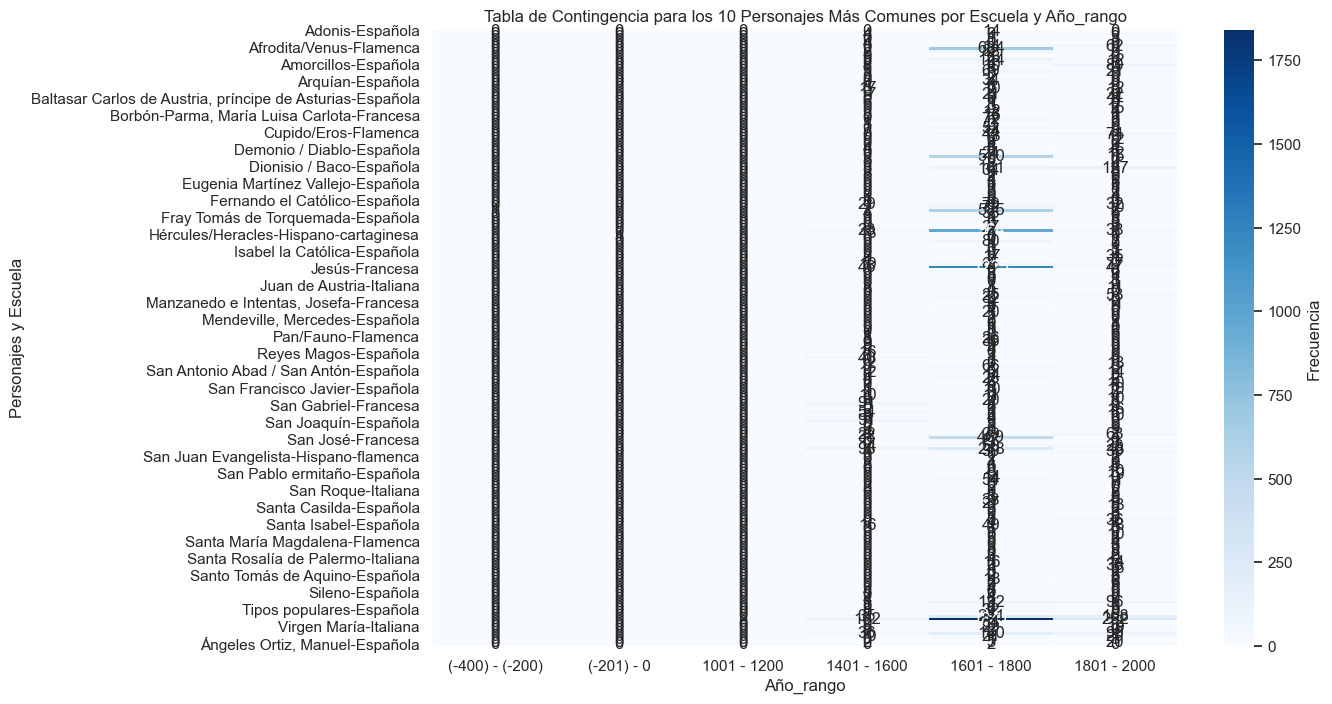

In [161]:
# Crear un mapa de calor con Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(tabla_contingencia, cmap="Blues", annot=True, fmt='d', cbar_kws={'label': 'Frecuencia'})
plt.title('Tabla de Contingencia para los 10 Personajes Más Comunes por Escuela y Año_rango')
plt.xlabel('Año_rango')
plt.ylabel('Personajes y Escuela')
plt.show()